# MOA Competition - 12 Models - LB 0.01805
Our MOA competition solution uses 5 types of models. They are inspired by public notebooks. Each individual model has approximately LB 0.01830 and CV 0.01560 (double stratified with control). The ensemble achieves 0.01815 and post process improves LB to 0.01805. 
* TabNet  
https://www.kaggle.com/josemori/moa-tabnet?scriptVersionId=44549085  
https://www.kaggle.com/hiramcho/moa-tabnet-with-pca-rank-gauss?scriptVersionId=45407015
* MX10 (pretrain then fine tune)    
https://www.kaggle.com/tolgadincer/moa-tensorfow-mx10
* DAE (denoising autoencoder)    
https://www.kaggle.com/felipebihaiek/prediction-with-swap-auto-encoder-features-0-01865?scriptVersionId=46316906
* EffNet (deepinsight images)    
https://www.kaggle.com/markpeng/deepinsight-efficientnet-b3-noisystudent
* NN and ResNet  
https://www.kaggle.com/thehemen/pytorch-transfer-learning-with-k-folds-by-drug-ids?scriptVersionId=46944058  
https://www.kaggle.com/rahulsd91/moa-multi-input-resnet-model

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%time
# 10 minutes
! python -W ignore ../input/finalmoascripts/dae-book3b.py

In [ ]:
%%time
# 10 minutes
! python -W ignore ../input/finalmoascripts/dae-book3c.py

In [ ]:
%%time
# 8 minutes
! python -W ignore ../input/finalmoascripts/cv-inference-efficientnet.py

In [ ]:
%%time
# 8 minutes
! python -W ignore ../input/finalmoascripts/cv-inference-efficientnet-augment.py

In [ ]:
%%time
# 1.5 minutes
! python -W ignore ../input/finalmoascripts/inference_mx10.py

In [ ]:
%%time
# 3 minutes
! python -W ignore ../input/finalmoascripts/updated-inference-final-mx10-transfer-3.py

In [ ]:
%%time
# 3.5 minutes
! python -W ignore ../input/finalmoascripts/inference_tabnet_dae.py

In [ ]:
%%time
# 3 minutes
! python -W ignore ../input/finalmoascripts/inference-tabnet-1830.py

In [ ]:
%%time
# 1.75 minutes
! python -W ignore ../input/finalmoascripts/inference_pytorch_nn_01833.py

In [ ]:
%%time
# 2.5 minutes
! python -W ignore ../input/finalmoascripts/NN1835.py

In [ ]:
%%time
# 1.75 minutes
! python -W ignore ../input/finalmoascripts/tabnet-public-184-inference.py

In [ ]:
%%time
# 3.5 minutes
! python -W ignore ../input/finalmoascripts/resnet-v64-infer.py

In [ ]:
ls

In [ ]:
test = pd.read_csv('/kaggle/input/lish-moa/test_features.csv').set_index('sig_id') 
print( test.shape )

# Our Models

In [ ]:
mx10 = pd.read_csv('submission_mx10.csv').set_index('sig_id')
mx10_updated = pd.read_csv('submission_mx10_updated.csv').set_index('sig_id')
tabnet_dae = pd.read_csv('submission_tabnet_01831.csv').set_index('sig_id')
tabnet_1830 = pd.read_csv('submission_tabnet_01830.csv').set_index('sig_id')
dae = pd.read_csv('submission_dae.csv').set_index('sig_id')
dae_updated = pd.read_csv('submission_dae_updated.csv').set_index('sig_id')
pytorch_nn = pd.read_csv('submission_pytorch_01833.csv').set_index('sig_id')
keras_resnet = pd.read_csv('submission_RES_v64.csv').set_index('sig_id')
effnet = pd.read_csv('submission_effnet.csv').set_index('sig_id')
effnet_augment = pd.read_csv('submission_effnet_augment.csv').set_index('sig_id')
tabnet_1840 = pd.read_csv('submission_tabnet_1840.csv').set_index('sig_id')
NN_1835 = pd.read_csv('submission_NN1835.csv').set_index('sig_id')

## MX10 model

In [ ]:
x = mx10.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## MX10 updated model

In [ ]:
x = mx10_updated.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## Tabnet DAE Model

In [ ]:
x = tabnet_dae.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## Tabnet 1830

In [ ]:
x = tabnet_1830.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## TabNet 1840

In [ ]:
x = tabnet_1840.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## DAE Model (0.2 noise)

In [ ]:
x = dae.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## DAE Updated Model (0.3 noise)

In [ ]:
x = dae_updated.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## PyTorch NN

In [ ]:
x = pytorch_nn.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## Public NN 1835

In [ ]:
x = NN_1835.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## Keras ResNet

In [ ]:
x = keras_resnet.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## DeepInsight EffNet

In [ ]:
x = effnet.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

## DeepInsight EffNet Augment

In [ ]:
x = effnet_augment.loc[test.cp_type=='trt_cp'].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

# Correlation

In [ ]:
df = pd.DataFrame()
df['TabNet_DAE'] = tabnet_dae.values.flatten()
df['TabNet_1830'] = tabnet_1830.values.flatten()
df['TabNet_1840'] = tabnet_1840.values.flatten()
df['MX10'] = mx10.values.flatten()
df['MX10_updated'] = mx10_updated.values.flatten()
df['PyTorch NN'] = pytorch_nn.values.flatten()
df['NN_1835'] = NN_1835.values.flatten()
df['Keras ResNet'] = keras_resnet.values.flatten()
df['DAE_0.2'] = dae.values.flatten()
df['DAE_0.3'] = dae_updated.values.flatten()
df['EffNet'] = effnet.values.flatten()
df['EffNet_augment'] = effnet_augment.values.flatten()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, fmt='0.3g')
plt.show()

# Build Ensemble

In [ ]:
sub1 = mx10.copy()
sub2 = tabnet_dae.loc[sub1.index,sub1.columns].copy()
sub3 = dae.loc[sub1.index,sub1.columns].copy()
sub4 = pytorch_nn.loc[sub1.index,sub1.columns].copy()
sub5 = keras_resnet.loc[sub1.index,sub1.columns].copy()
sub6 = effnet.loc[sub1.index,sub1.columns].copy()
sub7 = tabnet_1830.loc[sub1.index,sub1.columns].copy()
sub8 = tabnet_1840.loc[sub1.index,sub1.columns].copy()
sub9 = NN_1835.loc[sub1.index,sub1.columns].copy()
sub10 = dae_updated.loc[sub1.index,sub1.columns].copy()
sub11 = mx10_updated.loc[sub1.index,sub1.columns].copy()
sub12 = effnet_augment.loc[sub1.index,sub1.columns].copy()

test = test.loc[sub1.index]
test.reset_index(inplace=True)

In [ ]:
sub = ((sub2 + sub7 + sub8)/3. + (sub1 + sub11)/2. + (sub3 + sub10)/2. + (sub4 + sub5 + sub9)/3. + (sub6 + sub12)/2. )/5.
sub.reset_index(inplace=True)

In [ ]:
x = sub.loc[test.cp_type=='trt_cp',sub.columns[1:]].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

# Post Process
Some targets in train are both rare and unrecognized by our model. In this case the model predicts the mean target from train. Most likely these rare targets occur more frequently in test, so we will increase their predictions. Likewise some targets in train are both often and unrecognized. We will decrease these because they may be more rare in test.
  
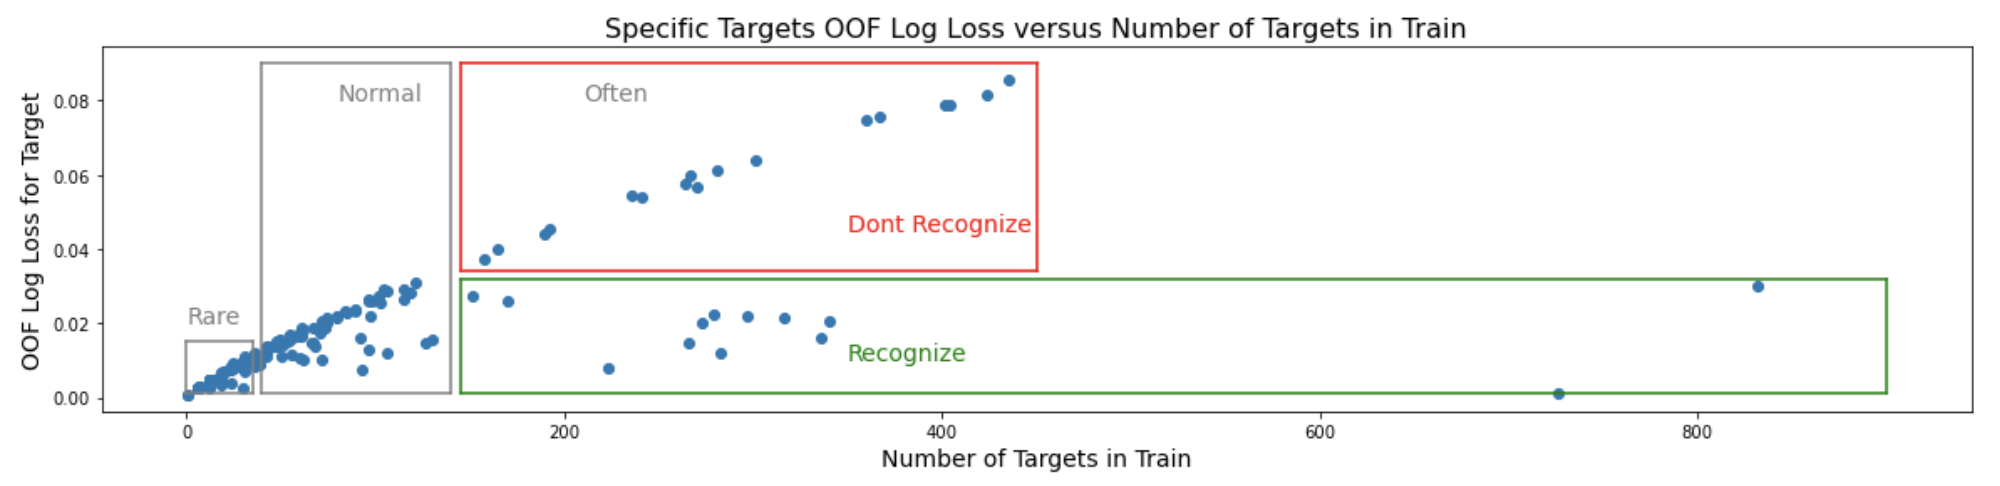

# Post Process "Often" Targets
Oftern Targets have `Target Count >= 145` in train

In [ ]:
# CONVERT PROBABILITIES TO ODDS, APPLY MULTIPLIER, CONVERT BACK TO PROBABILITIES
def scale(x,k):
    x = x.copy()
    idx = np.where(x!=1)[0]
    y = k * x[idx] / (1-x[idx])
    x[idx] =  y/(1+y)
    return x

In [ ]:
train = pd.read_csv('/kaggle/input/lish-moa/train_targets_scored.csv')

# "OFTEN" UNRECOGNIZED TARGETS
COLS = ['acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'adrenergic_receptor_agonist',
       'adrenergic_receptor_antagonist',
       'bacterial_cell_wall_synthesis_inhibitor',
       'calcium_channel_blocker', 'cyclooxygenase_inhibitor',
       'dna_inhibitor', 'dopamine_receptor_antagonist',
       'estrogen_receptor_agonist', 'gaba_receptor_antagonist',
       'glutamate_receptor_antagonist', 'histamine_receptor_antagonist',
       'phosphodiesterase_inhibitor', 'serotonin_receptor_agonist',
       'serotonin_receptor_antagonist', 'sodium_channel_inhibitor']

In [ ]:
# DECREASE PREDICTIONS FOR UNCERTAIN OFTEN TARGETS IN TRAIN
FACTOR = 0.725 # 5:1 odds
ct = 0

for c in COLS:
    t_sum = train[c].sum()
    m1 = train[c].mean()
    m2 = sub[c].mean()
    ratio = m2/m1
    
    # LINEAR FORMULA
    m = (FACTOR + (70-t_sum/6)/(70-25)*0.11) / ratio
    
    # QUADRATIC FORMULA 3:1 odds
    #coef = [ 1.18247190e-04, -1.54204106e-02,  1.11694136e+00]
    #x = t_sum/6
    #m = (coef[0]*x**2 + coef[1]*x + coef[2]) / ratio
    #m0 = (coef[0]*x**2 + coef[1]*x + coef[2])
    
    if m<1:
        print(c)
        #print('multiplier = %.3f'%m,'because t_sum = %i, ratio = %.2f (goal = %.2f)'%(t_sum,ratio,m0)) 
        print('multiplier = %.3f'%m,'because t_sum = %i, ratio = %.2f'%(t_sum,ratio))
        sub[c] = scale(sub[c].values,m)
        m3 = sub[c].mean()   
        r2 = m3/m1
        r3 = m3/m2
        print('  new ratio = %.2f, effective multiplier = %.3f'%(r2,r3))
        print()
        ct += 1
        
    else:
        print(c)
        print('### Skipping')
        print()
        
print('Updated',ct,'targets')

# Post Process "Rare" Targets
Rare Targets have `Target Count <= 31` in train

In [ ]:
# "RARE" UNRECOGNIZED TARGETS
COLS = ['erbb2_inhibitor', 'atp-sensitive_potassium_channel_antagonist',
       'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic',
       'leukotriene_inhibitor', 'coagulation_factor_inhibitor',
       'ras_gtpase_inhibitor', 'ubiquitin_specific_protease_inhibitor',
       'elastase_inhibitor', 'nicotinic_receptor_agonist',
       'protein_phosphatase_inhibitor', 'atm_kinase_inhibitor',
       'retinoid_receptor_antagonist', 'lxr_agonist',
       'autotaxin_inhibitor', 'tropomyosin_receptor_kinase_inhibitor',
       'diuretic', 'monoacylglycerol_lipase_inhibitor',
       'norepinephrine_reuptake_inhibitor', 'rna_polymerase_inhibitor',
       'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor',
       'laxative', 'steroid', 'pkc_inhibitor', 'glutamate_inhibitor',
       'lipase_inhibitor', 'tlr_antagonist',
       'nitric_oxide_production_inhibitor', 'antihistamine',
       'ampk_activator', 'protein_tyrosine_kinase_inhibitor',
       'caspase_activator', 'acat_inhibitor', 'pdk_inhibitor',
       'anticonvulsant', 'p-glycoprotein_inhibitor',
       'free_radical_scavenger', 'mineralocorticoid_receptor_antagonist',
       'beta_amyloid_inhibitor', 'smoothened_receptor_antagonist',
       'syk_inhibitor', 'analgesic', 'vitamin_b', 'tlr_agonist',
       'antiviral', 'antimalarial',
       'transient_receptor_potential_channel_antagonist',
       'cck_receptor_antagonist', 'wnt_inhibitor',
       'imidazoline_receptor_agonist', 'gonadotropin_receptor_agonist',
       'phospholipase_inhibitor', 'insulin_secretagogue',
       'thrombin_inhibitor']

In [ ]:
# INCREASE PREDICTIONS FOR UNCERTAIN RARE TARGETS IN TRAIN
FACTOR = 7 # 5:1 odds
ct = 0

for c in COLS:
    t_sum = train[c].sum()
    m1 = train[c].mean()
    m2 = sub[c].mean()
    ratio = m2/m1
    m = FACTOR*6/t_sum/ratio
    
    if m>1:
        print(c)
        print('multiplier = %.3f'%m,'because t_sum = %i, ratio = %.2f'%(t_sum,ratio))        
        sub[c] = scale(sub[c].values,m)
        m3 = sub[c].mean()   
        r2 = m3/m1
        r3 = m3/m2
        print('  new ratio = %.1f, effective multiplier = %.3f'%(r2,r3))
        print()
        ct += 1
        
    else:
        print(c)
        print('### Skipping')
        print()
        
print('Updated',ct,'targets')

# Write Submission CSV

In [ ]:
sub.to_csv('submission.csv',index=False)
sub.head()

In [ ]:
x = sub.loc[test.cp_type=='trt_cp',sub.columns[1:]].values
print('MIN pred',np.min(x),'MAX pred',np.max(x))
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.hist( x[x<0.01], bins=100)
plt.subplot(1,2,2)
plt.hist( x[x>0.9], bins=100)
plt.show()

In [ ]:
s = sub.loc[(test.cp_type=='ctl_vehicle').values].mean().sum()
print('Submission control row non-zeros = %i'%s)

In [ ]:
train = pd.read_csv('/kaggle/input/lish-moa/train_targets_scored.csv')
idx = np.random.randint(1,207,10)
train.iloc[:,idx].mean()

In [ ]:
sub[sub.columns[idx]].mean()